In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/moezali1/modelbit/main/loans.csv')
df.head()

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,No
1,38,30,53172,588,3,5442,Yes
2,6,31,90000,573,4,5000,Yes
3,15,29,74634,621,7,16074,Yes
4,35,36,78232,701,5,17742,No


In [3]:
#Exploratory data analysis
df.describe()

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,23.043600,32.903600,77313.455400,637.695400,7.285800,12437.020200
std,12.757611,8.197984,13922.930681,55.946283,4.691409,6207.884554
min,1.000000,21.000000,28000.000000,560.000000,1.000000,5000.000000
25%,11.000000,26.000000,67377.000000,586.000000,3.000000,6641.500000
50%,26.000000,31.000000,81886.500000,625.000000,6.000000,11681.500000
75%,34.000000,40.000000,90000.000000,695.000000,11.000000,17079.250000
max,46.000000,48.000000,90000.000000,740.000000,16.000000,29000.000000


In [4]:
df.isna().sum()

Applicant_ID             0
Age                      0
Annual_Income            0
Credit_Score             0
Employment_Years         0
Loan_Amount_Requested    0
Default                  0
dtype: int64

<Axes: >

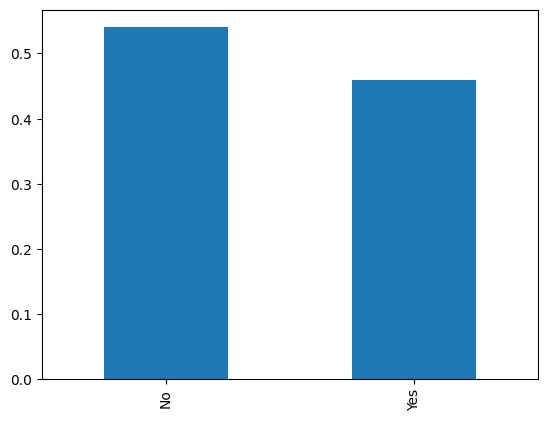

In [5]:
#data is clean so, we can proceed in EDA part now
df['Default'].value_counts(normalize=True).plot.bar()

<Axes: >

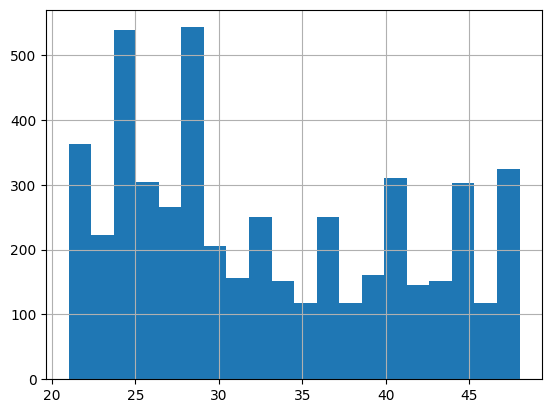

In [6]:
df['Age'].hist(bins=20)

<Axes: >

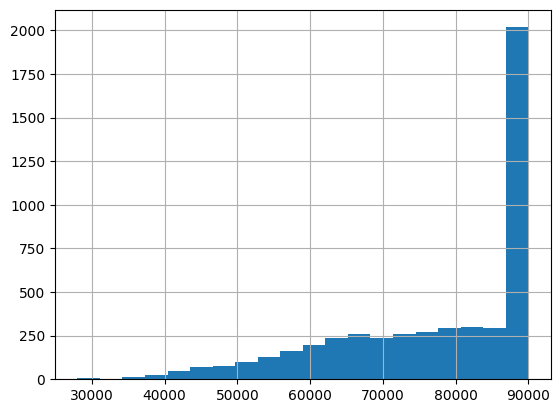

In [7]:
df['Annual_Income'].hist(bins=20)

<Axes: >

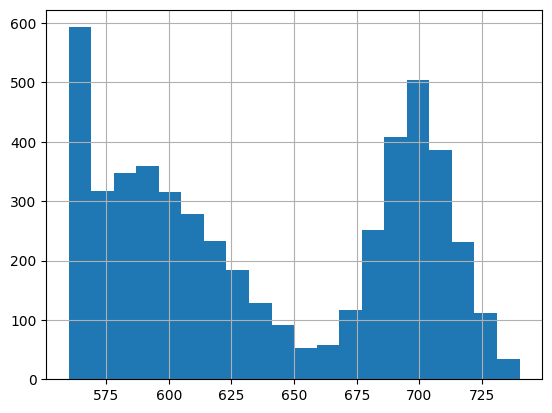

In [8]:
df['Credit_Score'].hist(bins=20)

<Axes: >

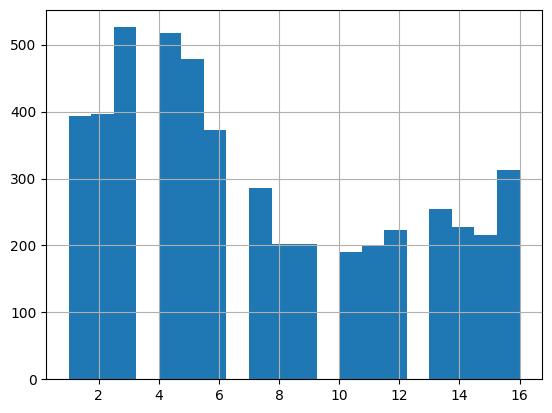

In [9]:
df['Employment_Years'].hist(bins=20)

<Axes: >

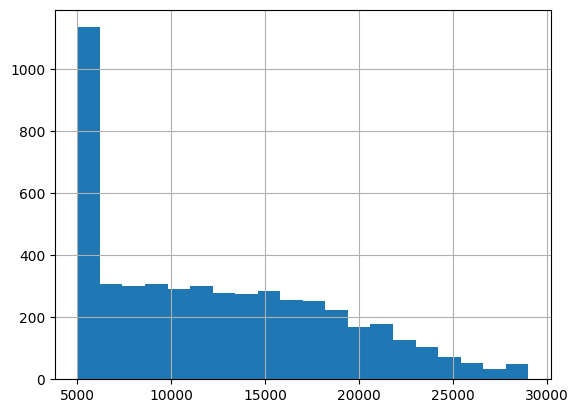

In [10]:
df['Loan_Amount_Requested'].hist(bins=20)

<Axes: xlabel='Age', ylabel='Count'>

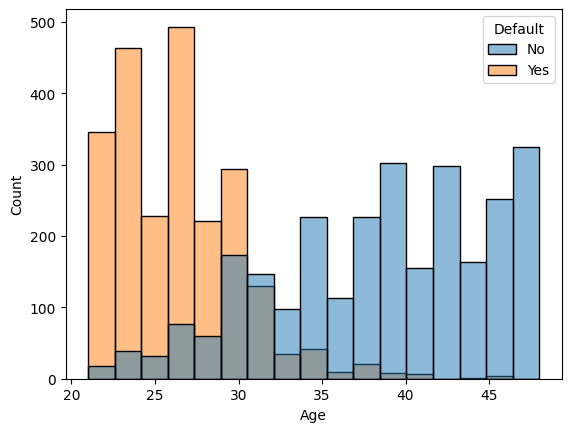

In [11]:
sns.histplot(df, x ='Age', hue='Default' )

In [12]:
#Model Taining and Selection
from sklearn.model_selection import train_test_split
from sklearn. pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

In [13]:
#Features and target variables
X = df.drop(columns=['Default','Applicant_ID'])
y = df['Default']

In [14]:
#column to be scaled
numeric_features = ['Annual_Income','Credit_Score','Employment_Years','Loan_Amount_Requested']

In [15]:
#columns to be binned and one-hot encoded
categorical_features = ['Age']

In [16]:
#create transformer
numeric_transformer = Pipeline(steps=[
  ('Imputer', SimpleImputer(strategy='median')),
  ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
  ('bins', KBinsDiscretizer(encode='ordinal', n_bins=6, strategy='quantile')),
  ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [17]:
#combine all the transformers into a preprocessor usinh ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [18]:
#create and evaluate the pipeline
pipeline = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('classifier', LogisticRegression())])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Annual_Income',
                                                   'Credit_Score',
                                                   'Employment_Years',
                                                   'Loan_Amount_Requested']),
                                                 ('cat',
                                                  Pipeline(steps=[('bins',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=6)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('classifier', LogisticRegression())])

In [19]:
#split the dataset and fit the piepline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#prinr the train and test shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(3500, 5)
(1500, 5)
(3500,)
(1500,)


In [20]:
pipeline.fit(X_train, y_train)
#generate the prediction
y_pred  = pipeline.predict(X_test)
y_pred

array(['No', 'Yes', 'Yes', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [21]:
#generate the prediction
y_pred_proba = pipeline.predict_proba(X_test)[:,1]
y_pred_proba

array([6.69689426e-05, 9.02806812e-01, 9.96185218e-01, ...,
       2.41424602e-02, 8.03381646e-01, 9.78944885e-01])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9606666666666667

In [23]:
#Model deployment using modelbit
!pip install modelbit

In [24]:
import modelbit
md = modelbit.login()

In [25]:
import pandas as pd
import numpy as np

# first define function
def predict_loan_default(Age: int, Annual_Income: float, Credit_Score: int, Employment_Years: float, Loan_Amount_Requested: float)-> float:

  """
  Predict the probability of loan default using a pre-trained machine learning pipeline.

  Args:
      Age (int): Applicant's age.
      Annual_Income (float): Applicant's annual income.
      Credit_Score (int): Applicant's credit score.
      Employment_Years (float): Number of years employed.
      Loan_Amount_Requested (float): Requested loan amount.

  Returns:
      float: Probability of loan default.
  """

  return pipeline.predict_proba(pd.DataFrame([[Age, Annual_Income, Credit_Score, Employment_Years, Loan_Amount_Requested]],
                                             columns = ['Age', 'Annual_Income', 'Credit_Score', 'Employment_Years', 'Loan_Amount_Requested']))[:,1]

In [26]:
df.head(5)

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,No
1,38,30,53172,588,3,5442,Yes
2,6,31,90000,573,4,5000,Yes
3,15,29,74634,621,7,16074,Yes
4,35,36,78232,701,5,17742,No


In [28]:
predict_loan_default(32,821233,689,1,10789)

array([4.28870351e-27])

In [30]:
md.deploy(predict_loan_default)

Uploading 'pipeline': 100%|██████████| 1.89k/1.89k [00:00<00:00, 9.16kB/s]


In [32]:


!curl -s -XPOST "https://padamregmi.us-east-1.modelbit.com/v1/predict_loan_default/latest" -d '{"data": [32, 821233, 689, 1, 10789]}' | json_pp

{
   "data" : [
      4.28870351436048e-27
   ]
}


In [33]:
!curl -s -XPOST "https://padamregmi.us-east-1.modelbit.com/v1/predict_loan_default/latest" -d '{"data": [30,53172,588,3,5442]}' | json_pp

{
   "data" : [
      0.996950514967483
   ]
}


In [34]:
#USing JSON library
import requests
import json
url = "https://padamregmi.us-east-1.modelbit.com/v1/predict_loan_default/latest"
headers = {"Content-Type": "application/json"}

data = {"data": [30,53172,588,3,5442]}

response = requests.post(url, json=data, headers=headers)
response_json = response.json()

print(json.dumps(response_json, indent=4))

{
    "data": [
        0.9969505149674829
    ]
}
